### Real data example

Synthetics are not real ... here we provide a collection of timeseries from a well log. This kind of data is characterized by *fairly* abrupt changes to the physical rock properties sensed by the tools as they pass through different geologic formations. The challenge in this real world example is that there are no perfect hard edges in the series.

The data satyr_3_wire_ow.las is provided by Geoscience Australia and use under a CC-BY 4.0 license. Additional data associated with this well can be found on the [NOPIMS website](https://nopims.dmp.wa.gov.au/NOPIMS/Search/WellDetails?id=ENO0595344#).


In [1]:
import matplotlib.pylab as plt
import numpy as np
from skimage import measure

from blockhead.util import (create_scale_space, 
                            default_synthetic,
                            populate_interval_tree)

from blockhead.visual import default_display

import lasio
from os import path

The lasio Python library is used to parse the well log, it returns and object with a collection of timeseries and the measured depth of the well. Use well_log.keys() to discover the available curves.

In [7]:
well_log = lasio.read(
    path.join("sample_data", "satyr_3_wire_ow.las"))
depth = well_log['DEPTH']
gamma_ray = well_log['GR']
# There are null values in the curves, remove these.
gamma_ray = gamma_ray[~np.isnan(gamma_ray)]

In [8]:
scale_space = create_scale_space(gamma_ray, 
                                 min_scale=5, 
                                 max_scale=2000,
                                 num_scales=100)

contours = measure.find_contours(scale_space["second"], 0)
interval_tree = populate_interval_tree(contours)

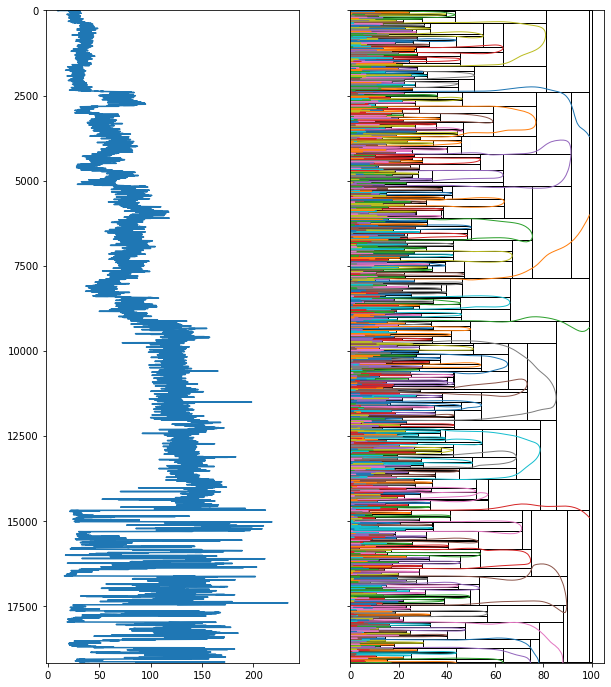

In [9]:
fig = default_display(gamma_ray, scale_space, interval_tree)

In [12]:
from blockhead.util import harmonic_average, slice_by_scale
#  set an arbitrary threshold, to define the scale to "block" the well at
threshold = 80
#  Compute a backus average Gamma-ray value over each interval
results = slice_by_scale(interval_tree['root'], threshold, gamma_ray, fn=harmonic_average)

(19174.0, 0.0)

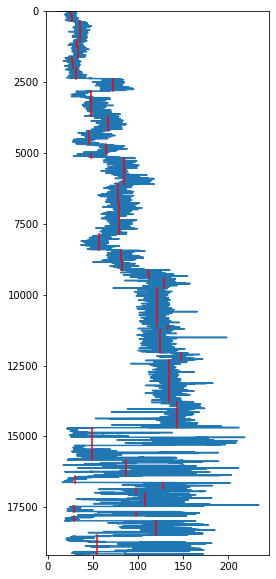

In [13]:
plt.figure(figsize=(4,10))
plt.plot(gamma_ray, range(len(gamma_ray)))
for result in results:
    node, data = result
    xmin, xmax = node.top_edge, node.bottom_edge
    ymin, ymax = data, data
    plt.plot([ymin, ymax], [xmin, xmax], '-r')
plt.ylim([len(gamma_ray), 0])